In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import mode

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.sii.isnull().sum()

1224

In [5]:
data.describe()

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,...,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii
count,3960.000000,3960.000000,2421.000000,3022.000000,3027.000000,3076.000000,898.000000,2954.000000,2967.000000,2954.000000,...,2728.000000,2725.000000,2728.000000,2730.000000,2733.000000,2736.000000,2609.000000,2606.000000,3301.000000,2736.000000
mean,10.433586,0.372727,65.454771,19.331929,55.946713,89.038615,27.278508,69.648951,81.597236,116.983074,...,1.452346,1.627890,1.613636,1.158974,0.943652,27.896199,41.088923,57.763622,1.060588,0.580409
std,3.574648,0.483591,22.341862,5.113934,7.473764,44.569040,5.567287,13.611226,13.665196,17.061225,...,1.495600,1.445622,1.529178,1.343661,1.185460,20.338853,10.427433,13.196091,1.094875,0.771122
min,5.000000,0.000000,25.000000,0.000000,33.000000,0.000000,18.000000,0.000000,27.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,38.000000,0.000000,0.000000
25%,8.000000,0.000000,59.000000,15.869350,50.000000,57.200000,23.000000,61.000000,72.000000,107.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,33.000000,47.000000,0.000000,0.000000
50%,10.000000,0.000000,65.000000,17.937682,55.000000,77.000000,26.000000,68.000000,81.000000,114.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,26.000000,39.000000,55.000000,1.000000,0.000000
75%,13.000000,1.000000,75.000000,21.571244,62.000000,113.800000,30.000000,76.000000,90.500000,125.000000,...,2.000000,3.000000,2.000000,2.000000,1.000000,41.000000,46.000000,64.000000,2.000000,1.000000
max,22.000000,1.000000,999.000000,59.132048,78.500000,315.000000,50.000000,179.000000,138.000000,203.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,93.000000,96.000000,100.000000,3.000000,3.000000


In [6]:
data.isnull().sum()

id                                           0
Basic_Demos-Enroll_Season                    0
Basic_Demos-Age                              0
Basic_Demos-Sex                              0
CGAS-Season                               1405
                                          ... 
SDS-SDS_Total_Raw                         1351
SDS-SDS_Total_T                           1354
PreInt_EduHx-Season                        420
PreInt_EduHx-computerinternet_hoursday     659
sii                                       1224
Length: 82, dtype: int64

In [7]:
data.shape

(3960, 82)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Basic_Demos-Enroll_Season               3960 non-null   object 
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   CGAS-CGAS_Score                         2421 non-null   float64
 6   Physical-Season                         3310 non-null   object 
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   float64
 10  Physical-Waist_Circumference            898 non-null    floa

# Data Cleaning

In [9]:
#columns with more than 40% null values
drop_col = []
for column in data.columns:
    if data[column].isna().sum()/data.shape[0] > 0.4:
        drop_col.append(column)

In [10]:
#dropping the columns with more than 40% null values
data = data.drop(drop_col, axis=1)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 42 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Basic_Demos-Enroll_Season               3960 non-null   object 
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   CGAS-CGAS_Score                         2421 non-null   float64
 6   Physical-Season                         3310 non-null   object 
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   float64
 10  Physical-Diastolic_BP                   2954 non-null   floa

In [12]:
#dropping seasons columns
seasons = ['Basic_Demos-Enroll_Season', 'CGAS-Season', 'Physical-Season', 'FGC-Season', 'PCIAT-Season', 'SDS-Season', 'PreInt_EduHx-Season']
data = data.drop(seasons, axis=1)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 35 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Basic_Demos-Age                         3960 non-null   int64  
 2   Basic_Demos-Sex                         3960 non-null   int64  
 3   CGAS-CGAS_Score                         2421 non-null   float64
 4   Physical-BMI                            3022 non-null   float64
 5   Physical-Height                         3027 non-null   float64
 6   Physical-Weight                         3076 non-null   float64
 7   Physical-Diastolic_BP                   2954 non-null   float64
 8   Physical-HeartRate                      2967 non-null   float64
 9   Physical-Systolic_BP                    2954 non-null   float64
 10  PCIAT-PCIAT_01                          2733 non-null   floa

- For columns with continous variables, we shall replace null values with column's mean

In [14]:
#columns in which we replace null values with the column's mean
mean_col = ['Basic_Demos-Age', 'CGAS-CGAS_Score', 'Physical-BMI', 'Physical-Height', 
            'Physical-Weight', 'Physical-Diastolic_BP', 'Physical-HeartRate', 
            'Physical-Systolic_BP', 'SDS-SDS_Total_Raw', 'SDS-SDS_Total_T']

In [15]:
for col in mean_col:
    data[col] = data[col].fillna(data[col].mean())

In [16]:
#dropping id column
data = data.drop('id', axis=1)

- For columns with categorical variables, we shall replace null values with column's mode

In [17]:
#columns in which we replace null values with the column's mode
mode_col = []
for i in data.columns:
    if i not in mean_col:
        mode_col.append(i)

In [18]:
mode_col

['Basic_Demos-Sex',
 'PCIAT-PCIAT_01',
 'PCIAT-PCIAT_02',
 'PCIAT-PCIAT_03',
 'PCIAT-PCIAT_04',
 'PCIAT-PCIAT_05',
 'PCIAT-PCIAT_06',
 'PCIAT-PCIAT_07',
 'PCIAT-PCIAT_08',
 'PCIAT-PCIAT_09',
 'PCIAT-PCIAT_10',
 'PCIAT-PCIAT_11',
 'PCIAT-PCIAT_12',
 'PCIAT-PCIAT_13',
 'PCIAT-PCIAT_14',
 'PCIAT-PCIAT_15',
 'PCIAT-PCIAT_16',
 'PCIAT-PCIAT_17',
 'PCIAT-PCIAT_18',
 'PCIAT-PCIAT_19',
 'PCIAT-PCIAT_20',
 'PCIAT-PCIAT_Total',
 'PreInt_EduHx-computerinternet_hoursday',
 'sii']

In [19]:
mode_col.remove('sii')
for col in mode_col:
    data[col] = data[col].fillna(data[col].mode()[0])

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 34 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Basic_Demos-Age                         3960 non-null   int64  
 1   Basic_Demos-Sex                         3960 non-null   int64  
 2   CGAS-CGAS_Score                         3960 non-null   float64
 3   Physical-BMI                            3960 non-null   float64
 4   Physical-Height                         3960 non-null   float64
 5   Physical-Weight                         3960 non-null   float64
 6   Physical-Diastolic_BP                   3960 non-null   float64
 7   Physical-HeartRate                      3960 non-null   float64
 8   Physical-Systolic_BP                    3960 non-null   float64
 9   PCIAT-PCIAT_01                          3960 non-null   float64
 10  PCIAT-PCIAT_02                          3960 non-null   floa

# Using Unsupervised learning to predict missing values in target column

In [21]:
#Implementing clustering on data with non null target value
non_empty_data = data[data['sii'].notna()]

In [22]:
non_empty_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2736 entries, 0 to 3958
Data columns (total 34 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Basic_Demos-Age                         2736 non-null   int64  
 1   Basic_Demos-Sex                         2736 non-null   int64  
 2   CGAS-CGAS_Score                         2736 non-null   float64
 3   Physical-BMI                            2736 non-null   float64
 4   Physical-Height                         2736 non-null   float64
 5   Physical-Weight                         2736 non-null   float64
 6   Physical-Diastolic_BP                   2736 non-null   float64
 7   Physical-HeartRate                      2736 non-null   float64
 8   Physical-Systolic_BP                    2736 non-null   float64
 9   PCIAT-PCIAT_01                          2736 non-null   float64
 10  PCIAT-PCIAT_02                          2736 non-null   float64
 

In [23]:
df_features =  non_empty_data.drop('sii', axis=1)
target = non_empty_data['sii']

In [24]:
# Standardize the features
scaler = StandardScaler()
data_features_scaled = scaler.fit_transform(df_features)

In [25]:
#after trying different values n_clusters, 8 gave the best accuracy
n_clusters = 8
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10)
kmeans.fit(data_features_scaled)

KMeans(n_init=10, random_state=42)

In [26]:
clusters = kmeans.labels_

In [27]:
# Create a mapping between cluster labels and actual labels
label_mapping = {}
for cluster_id in range(n_clusters):
    mask = (clusters == cluster_id)
    true_labels = target[mask]
    if len(true_labels) > 0:
        most_common_label = mode(true_labels).mode
        label_mapping[cluster_id] = most_common_label

In [28]:
label_mapping

{0: 0.0, 1: 1.0, 2: 0.0, 3: 1.0, 4: 2.0, 5: 2.0, 6: 1.0, 7: 0.0}

In [29]:
# Assign predicted labels based on the mapping
predicted_labels = np.array([label_mapping[cluster] for cluster in clusters])

In [30]:
# Calculate accuracy
accuracy = accuracy_score(target, predicted_labels)
accuracy

0.8969298245614035

- Therefore, through clustering we are able to predict target labels with 89% accuaracy
- Hence we can use this model to predict missing values in target columnn instead of removing them while preserving datasets integrity

In [31]:
#data with null target values
null_data = data[data['sii'].isnull()]

In [32]:
# Separate features and target for null data
null_features = null_data.drop('sii', axis=1)
null_features_scaled = scaler.transform(null_features)

In [33]:
# Predict clusters for null data
predicted_clusters = kmeans.predict(null_features_scaled)

In [34]:
# Assign predicted labels based on the mapping
predicted_labels = [label_mapping[cluster] for cluster in predicted_clusters]

In [35]:
# Fill in the missing target values
data.loc[data['sii'].isnull(), 'sii'] = predicted_labels

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 34 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Basic_Demos-Age                         3960 non-null   int64  
 1   Basic_Demos-Sex                         3960 non-null   int64  
 2   CGAS-CGAS_Score                         3960 non-null   float64
 3   Physical-BMI                            3960 non-null   float64
 4   Physical-Height                         3960 non-null   float64
 5   Physical-Weight                         3960 non-null   float64
 6   Physical-Diastolic_BP                   3960 non-null   float64
 7   Physical-HeartRate                      3960 non-null   float64
 8   Physical-Systolic_BP                    3960 non-null   float64
 9   PCIAT-PCIAT_01                          3960 non-null   float64
 10  PCIAT-PCIAT_02                          3960 non-null   floa

# Exploratory data analysis

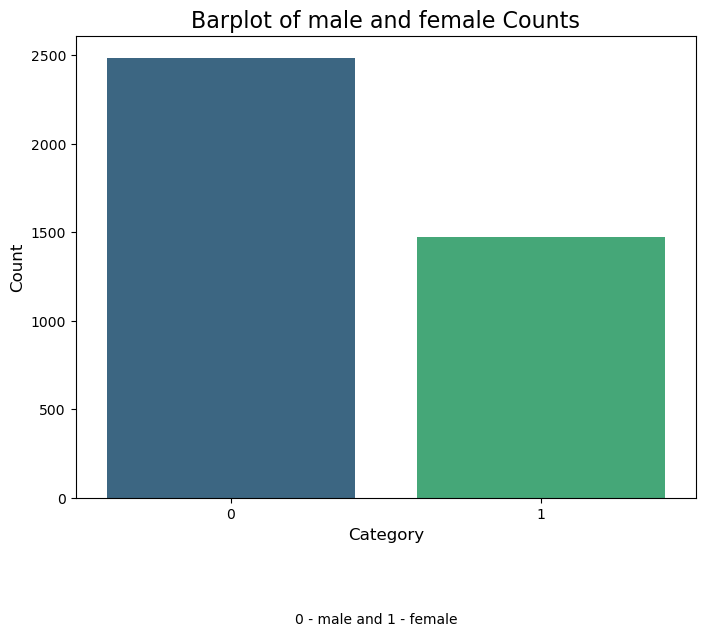

In [37]:
#Distribution of genders in the dataset
value_counts = data['Basic_Demos-Sex'].value_counts()

# Plot a barplot
plt.figure(figsize=(8, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')

plt.title('Barplot of male and female Counts', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.figtext(0.5, -0.1, "0 - male and 1 - female", 
            wrap=True, horizontalalignment='center', fontsize=10)
# Show the plot
plt.show()

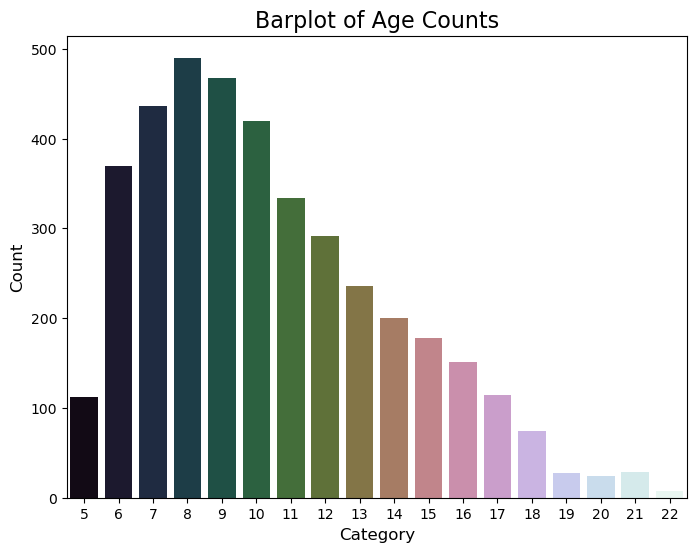

In [38]:
#Distribution of ages in the dataset
value_counts = data['Basic_Demos-Age'].value_counts()

# Plot a barplot
plt.figure(figsize=(8, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, palette="cubehelix")

plt.title('Barplot of Age Counts', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()

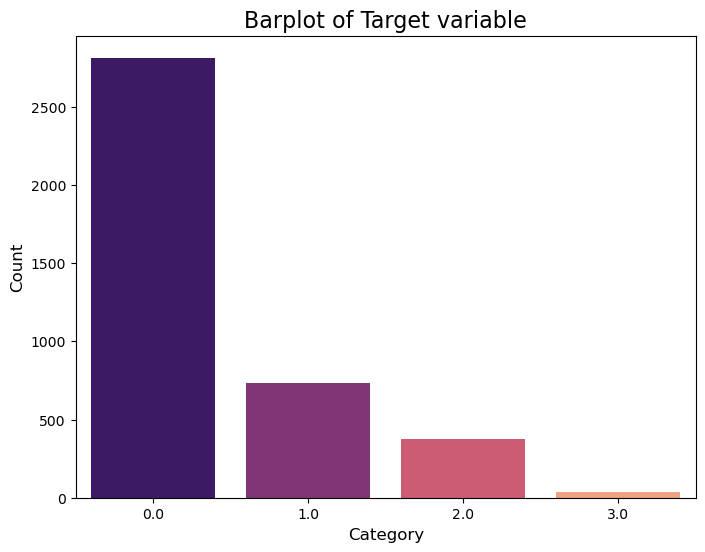

In [39]:
#Distribution of target variable in the dataset
value_counts = data['sii'].value_counts()

# Plot a barplot
plt.figure(figsize=(8, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, palette="magma")

plt.title('Barplot of Target variable', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()

- This distribution indicates class imbalance, therefore it is important for us to train a model that can accurately predict the less frequent classes

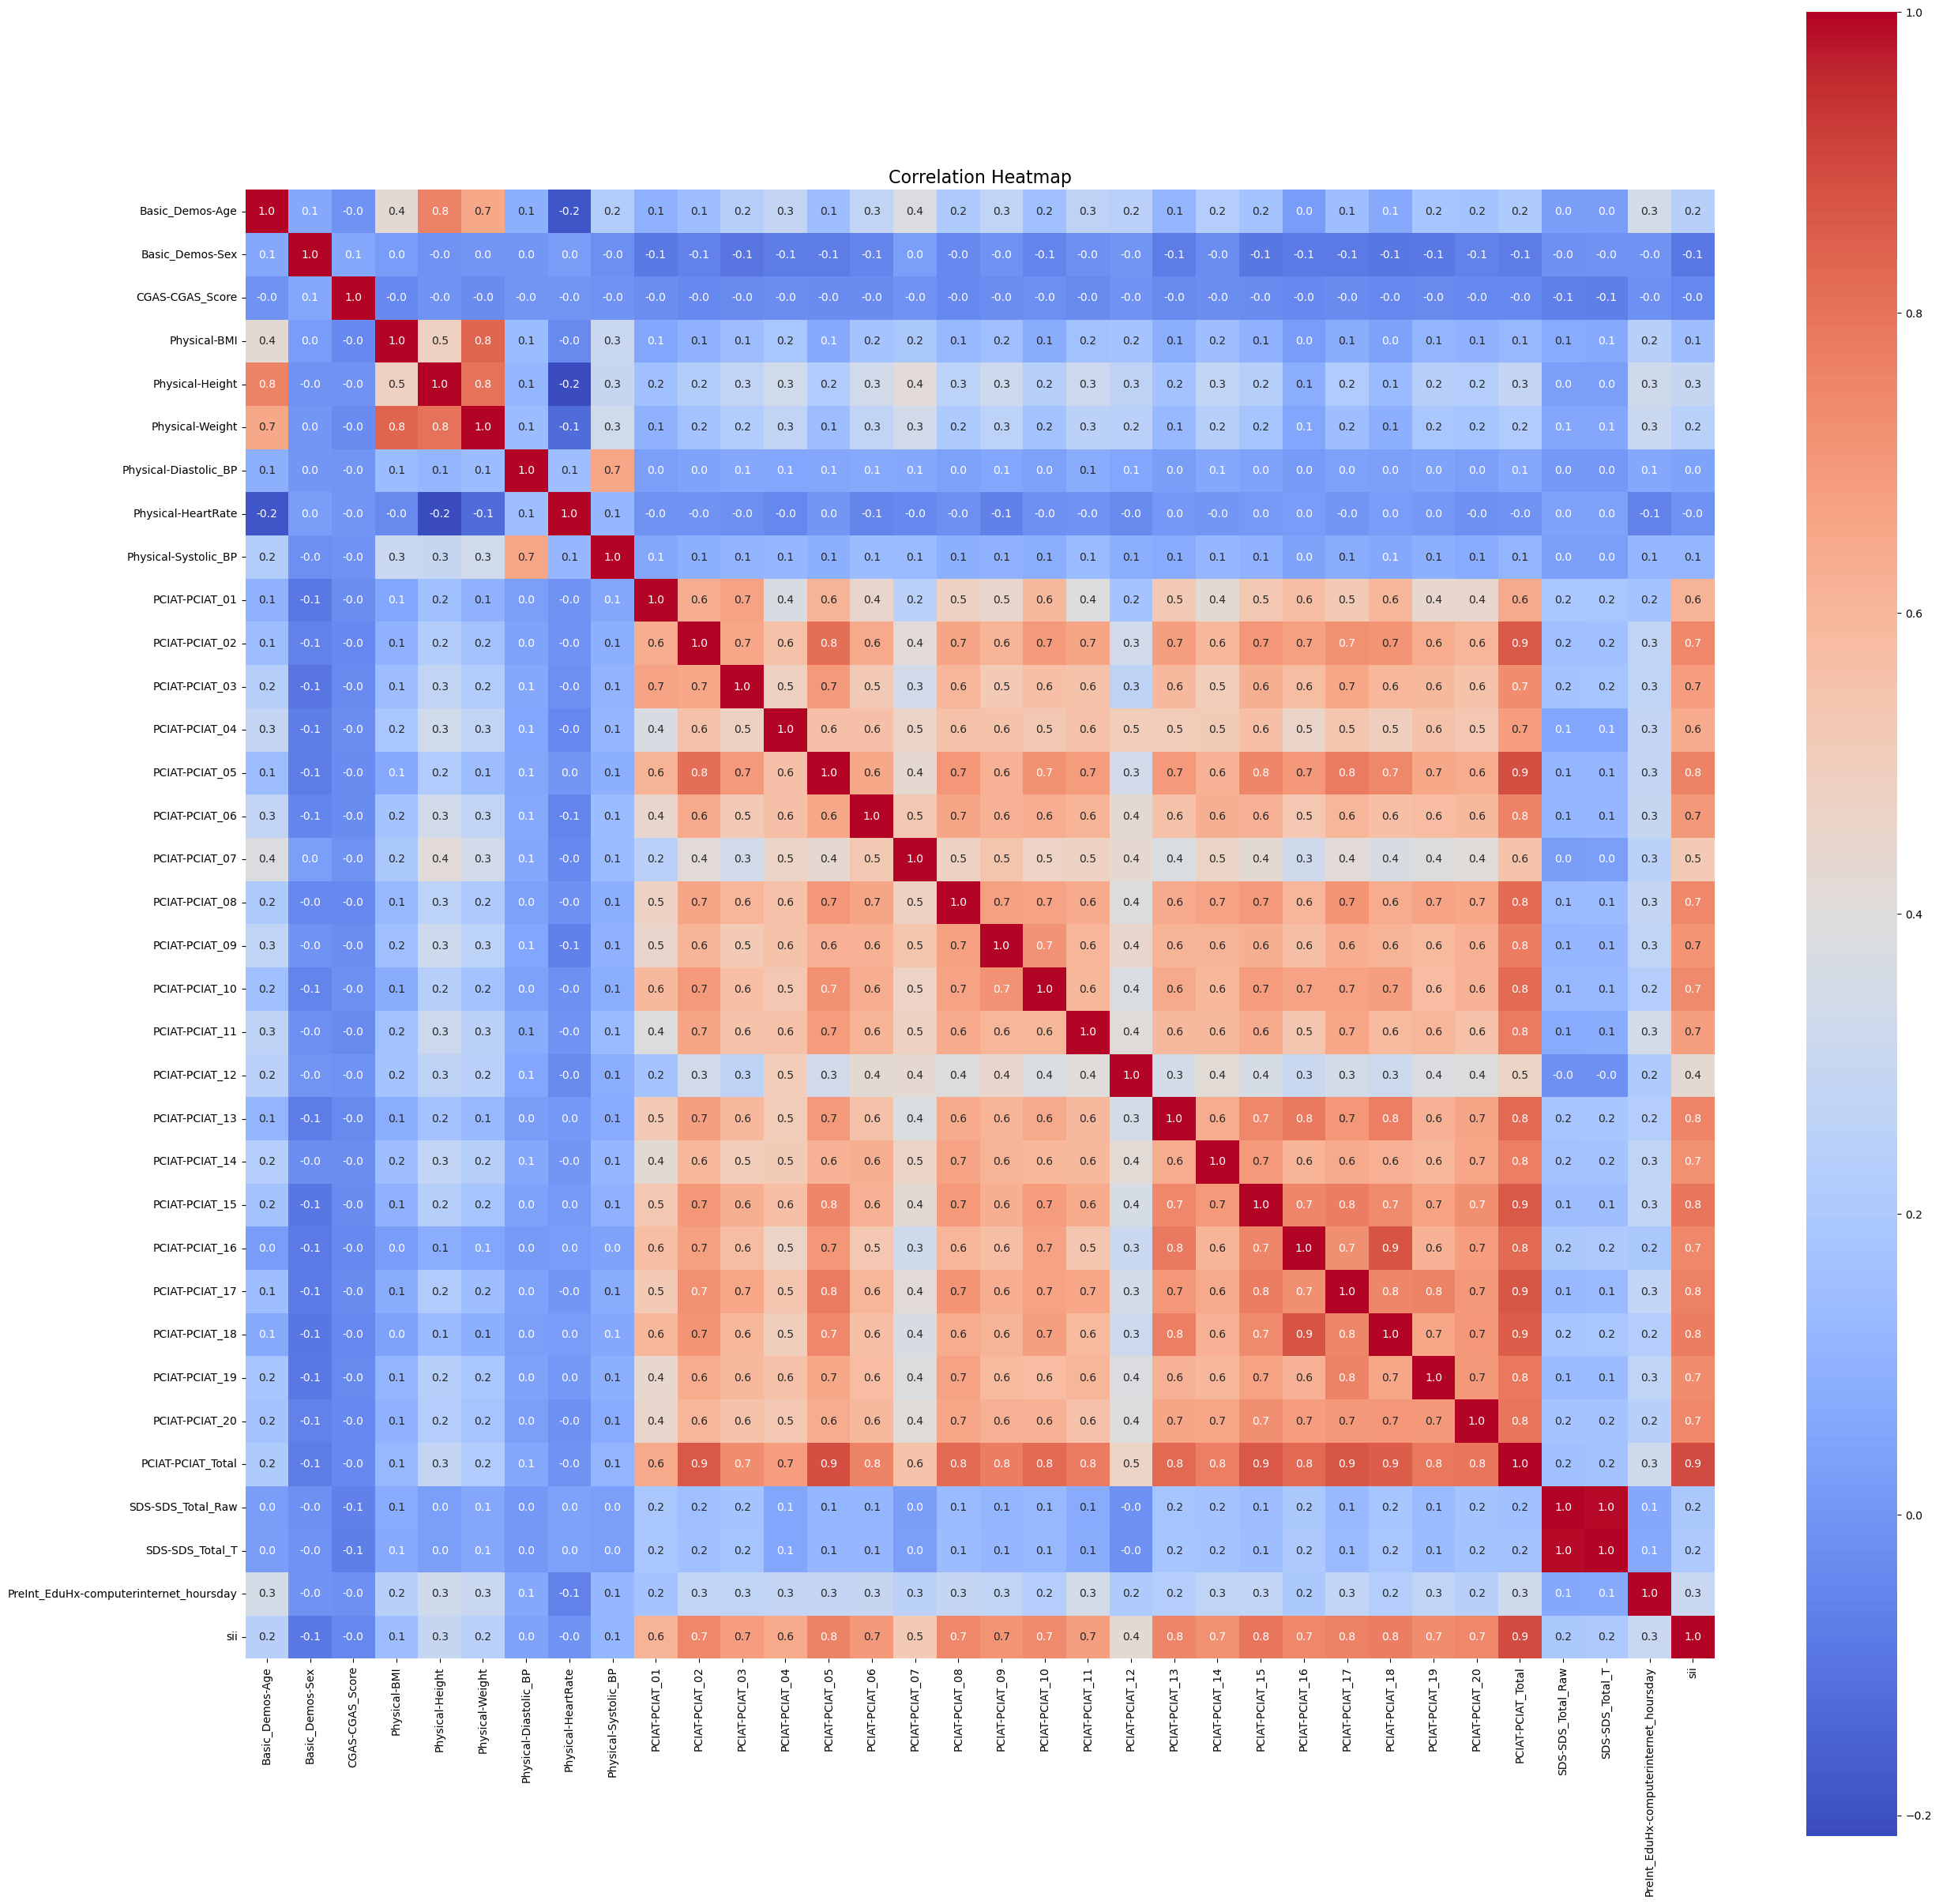

In [40]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap="coolwarm", cbar=True, square=True)

# Add title
plt.title("Correlation Heatmap", fontsize=16)

# Display the heatmap
plt.show()

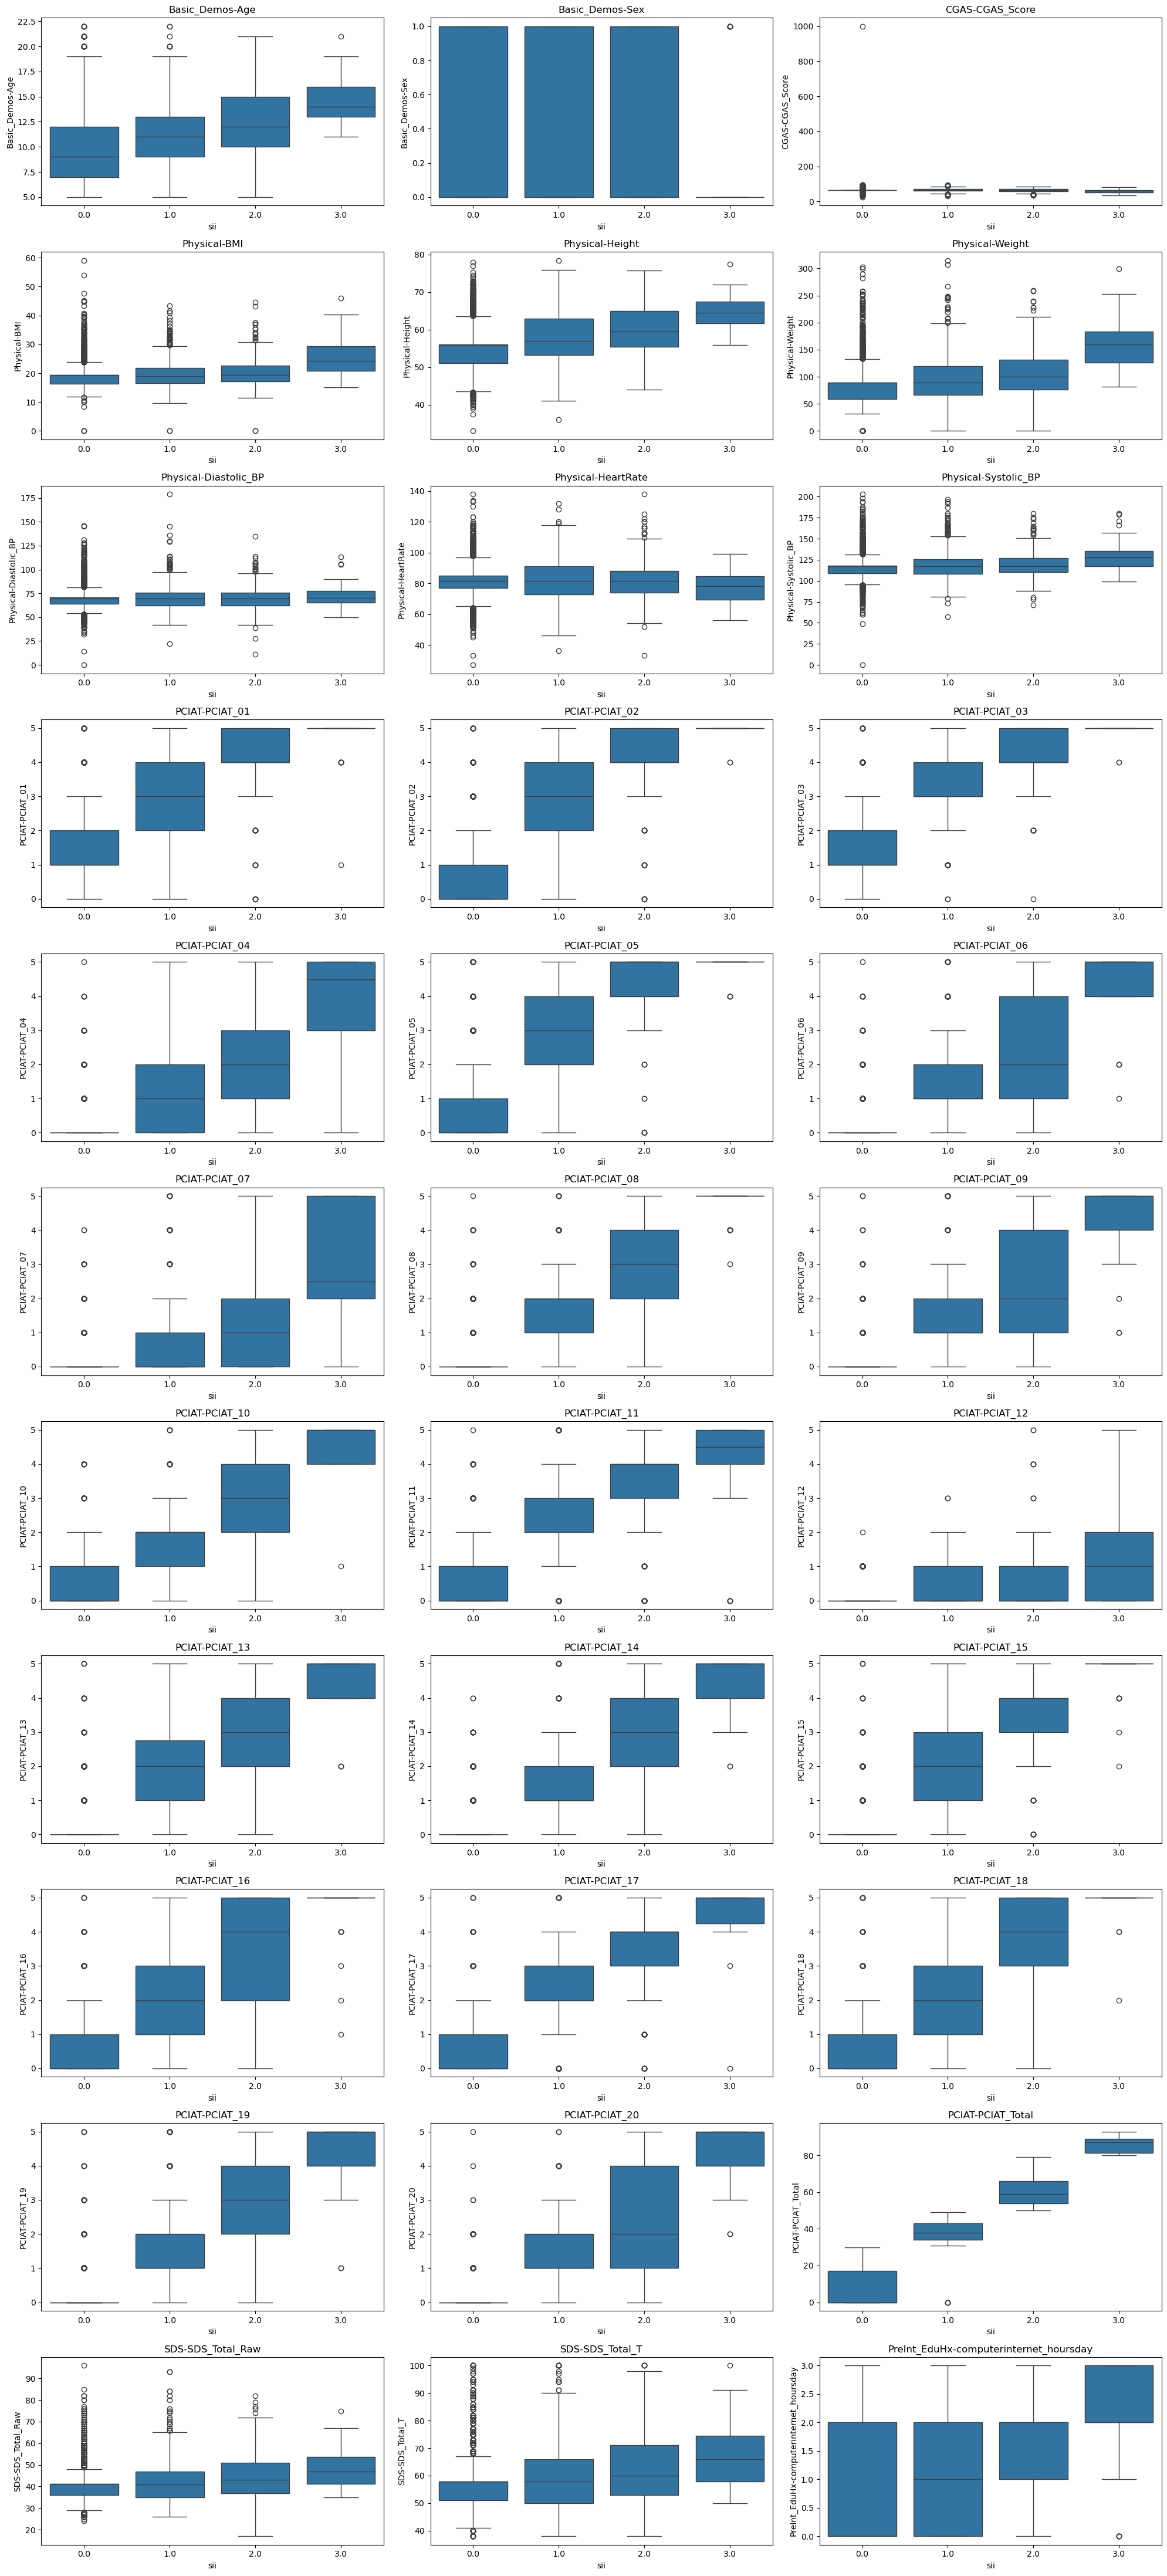

In [41]:
feature_col = data.drop('sii', axis=1).columns
plots_per_row = 3
n_rows = (len(feature_col) + plots_per_row - 1) // plots_per_row
plt.figure(figsize=(20, 4 * n_rows))
for i, col in enumerate(feature_col):
    plt.subplot(n_rows, plots_per_row, i + 1)
    sns.boxplot(x='sii', y=col, data=data)
    plt.title(col)
    plt.tight_layout()
plt.show()

## Splitting the data

In [42]:
X = data.drop('sii', axis=1)
y = data['sii']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Logistic Regression (One vs Rest)

In [43]:
# Train a Logistic Regression model
log_reg_ovr = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=1000, random_state=42)
log_reg_ovr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='ovr', random_state=42)

In [44]:
# Make predictions
y_pred_ovr = log_reg_ovr.predict(X_test)

In [45]:
# Evaluate the model
accuracy_ovr = accuracy_score(y_test, y_pred_ovr)
print(f"Accuracy: {accuracy_ovr:.2f}")

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_ovr))

# Confusion matrix
conf_matrix_ovr = confusion_matrix(y_test, y_pred_ovr)
print("\nClassification Report:\n")
print(conf_matrix_ovr)


Accuracy: 0.95

Classification Report:

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       839
         1.0       0.88      0.88      0.88       217
         2.0       0.92      0.82      0.87       120
         3.0       1.00      0.75      0.86        12

    accuracy                           0.95      1188
   macro avg       0.94      0.86      0.90      1188
weighted avg       0.95      0.95      0.95      1188


Classification Report:

[[833   6   0   0]
 [ 20 191   6   0]
 [  0  21  99   0]
 [  0   0   3   9]]


### One vs One model

In [46]:
#Initialize and train the model
ovo_model = OneVsOneClassifier(LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42))
ovo_model.fit(X_train, y_train)

#make predictions
y_pred_ovo = ovo_model.predict(X_test)

In [47]:
# Evaluate the model
accuracy_ovo = accuracy_score(y_test, y_pred_ovo)
print(f"Accuracy: {accuracy_ovo:.2f}")

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_ovo))

# Confusion matrix
conf_matrix_ovo = confusion_matrix(y_test, y_pred_ovo)
print("\nConfusion Matrix:\n")
print(conf_matrix_ovo)

Accuracy: 0.98

Classification Report:

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       839
         1.0       0.93      0.94      0.94       217
         2.0       0.98      0.98      0.98       120
         3.0       0.92      1.00      0.96        12

    accuracy                           0.98      1188
   macro avg       0.95      0.98      0.97      1188
weighted avg       0.98      0.98      0.98      1188


Confusion Matrix:

[[825  14   0   0]
 [  9 205   3   0]
 [  0   1 118   1]
 [  0   0   0  12]]


### Training a logistic regression model (softmax regression)

In [48]:
# Train a Logistic Regression model
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

In [49]:
# Make predictions
y_pred_logistic = log_reg.predict(X_test)

In [50]:
# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_logistic)
print(f"Accuracy: {accuracy_lr:.2f}")

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred_logistic))

# Confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_logistic)
print("\nClassification Report:\n")
print(conf_matrix_lr)

Accuracy: 0.96

Classification Report:

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       839
         1.0       0.90      0.89      0.90       217
         2.0       0.93      0.95      0.94       120
         3.0       0.85      0.92      0.88        12

    accuracy                           0.96      1188
   macro avg       0.91      0.93      0.92      1188
weighted avg       0.96      0.96      0.96      1188


Classification Report:

[[821  18   0   0]
 [ 15 194   8   0]
 [  0   4 114   2]
 [  0   0   1  11]]


### Training the Random forest model

In [51]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, 
                                  max_depth=10, 
                                  min_samples_split=10, 
                                  min_samples_leaf=4)

In [52]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [53]:
y_pred_random = rf_model.predict(X_test)
# Evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_random)
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_random)
print("Confusion Matrix: ")
print(conf_matrix)
print(f"Accuracy: {accuracy_rf:.2f}")
# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_random))

Confusion Matrix: 
[[839   0   0   0]
 [  1 216   0   0]
 [  0   1 119   0]
 [  0   0   6   6]]
Accuracy: 0.99

Classification Report:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       839
         1.0       1.00      1.00      1.00       217
         2.0       0.95      0.99      0.97       120
         3.0       1.00      0.50      0.67        12

    accuracy                           0.99      1188
   macro avg       0.99      0.87      0.91      1188
weighted avg       0.99      0.99      0.99      1188



### Train a decision Tree

In [54]:
# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=3, 
                                  min_samples_split=10, 
                                  min_samples_leaf=4,
                                  random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [55]:
# Make predictions
y_pred_decision = dt_model.predict(X_test)

In [56]:
# Evaluate the model
accuracy_dt = accuracy_score(y_test,y_pred_decision)
print(f"Accuracy: {accuracy_dt:.2f}")

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_decision))

# Confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_decision)
print("\nClassification Report:\n")
print(conf_matrix_dt)

Accuracy: 1.00

Classification Report:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       839
         1.0       1.00      1.00      1.00       217
         2.0       1.00      1.00      1.00       120
         3.0       1.00      1.00      1.00        12

    accuracy                           1.00      1188
   macro avg       1.00      1.00      1.00      1188
weighted avg       1.00      1.00      1.00      1188


Classification Report:

[[839   0   0   0]
 [  0 217   0   0]
 [  0   0 120   0]
 [  0   0   0  12]]


### Model Comparision 

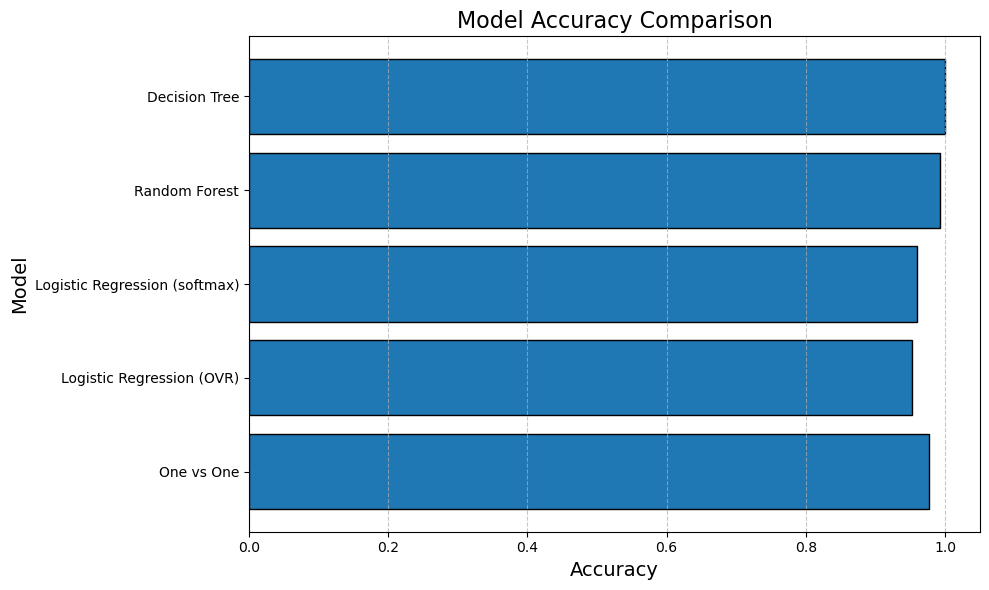

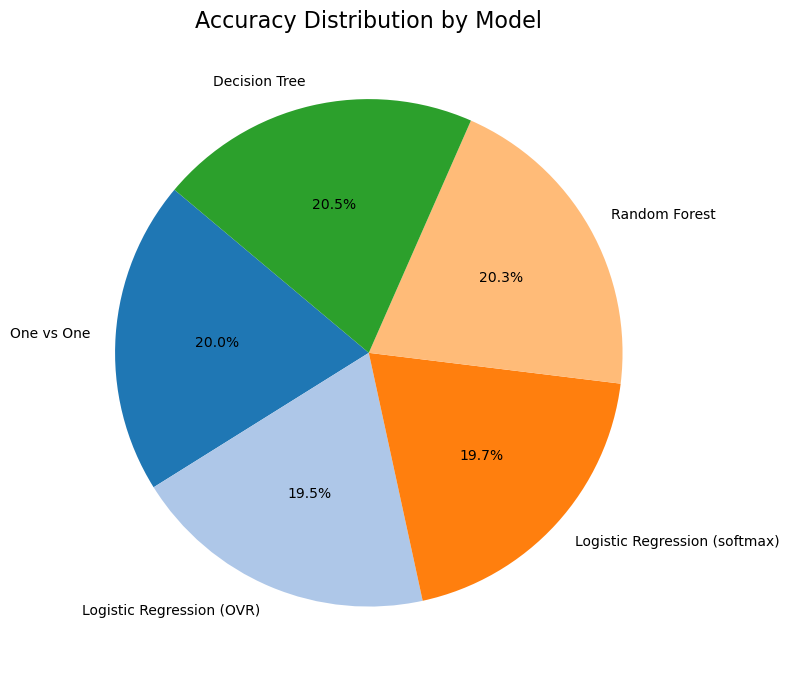

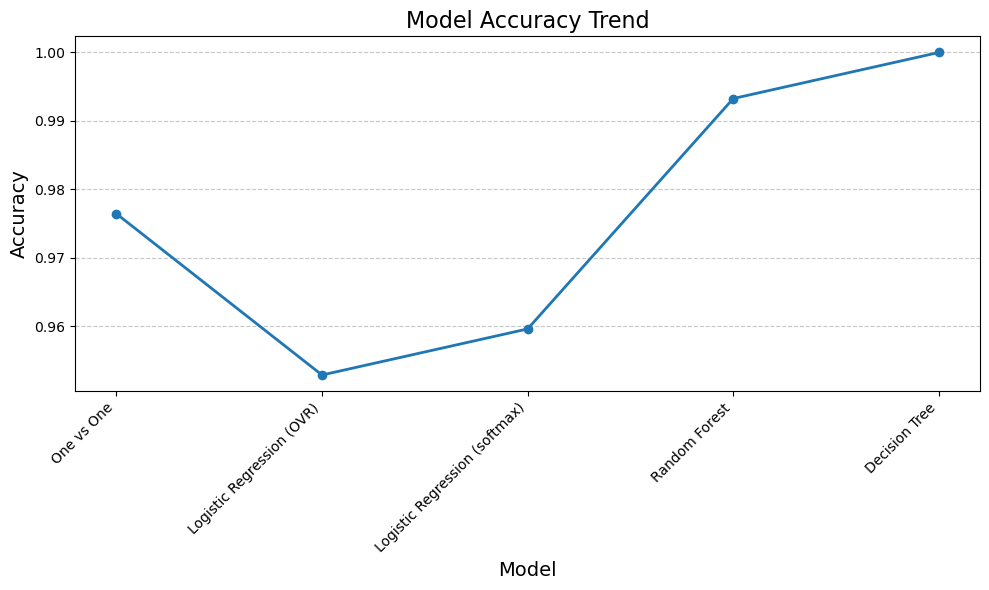

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Dictionary to store model names and their accuracies
model_accuracies = {
    "One vs One": accuracy_ovo,
    "Logistic Regression (OVR)": accuracy_ovr,  
    "Logistic Regression (softmax)": accuracy_lr,
    "Random Forest": accuracy_rf,              
    "Decision Tree": accuracy_dt,              
    
}

# Convert the dictionary to a DataFrame for better manipulation
accuracy_df = pd.DataFrame(
    list(model_accuracies.items()), columns=["Model", "Accuracy"]
)

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.barh(accuracy_df['Model'], accuracy_df['Accuracy'], edgecolor='black')
plt.xlabel('Accuracy', fontsize=14)
plt.ylabel('Model', fontsize=14)
plt.title('Model Accuracy Comparison', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot a pie chart for accuracies
plt.figure(figsize=(8, 8))
plt.pie(
    accuracy_df['Accuracy'], 
    labels=accuracy_df['Model'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.tab20.colors
)
plt.title('Accuracy Distribution by Model', fontsize=16)
plt.tight_layout()
plt.show()

# Plot a line chart for accuracies
plt.figure(figsize=(10, 6))
plt.plot(accuracy_df['Model'], accuracy_df['Accuracy'], marker='o', linestyle='-', linewidth=2)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Model Accuracy Trend', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Save the DataFrame as a CSV file for further use
accuracy_df.to_csv('model_accuracies.csv', index=False)
